<a href="https://colab.research.google.com/github/Madhav2204/Digital-Image-Processing-and-Pattern-Rcognition-/blob/main/P4_Frequency_Domain_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment-04**


### **1. Discrete Fourier Transform**
The general idea is that the image (f(x,y) of size M x N) will be represented in the frequency domain (F(u,v)). The equation for the two-dimensional discrete Fourier transform (DFT) .

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Untitled.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


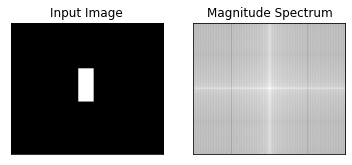

In [ ]:
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
cv2.imwrite("idft.jpg", magnitude_spectrum)
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

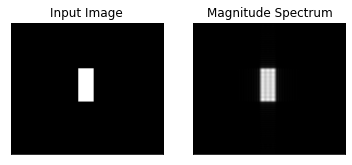

In [ ]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


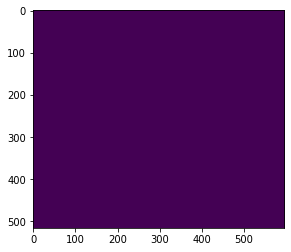

In [ ]:
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8)
plt.imshow(log_transformed) 

In [ ]:
cv2.imwrite("/content/idft.jpg", log_transformed)
cv2.waitKey(0)

-1

### **2. Frequency Domain Versions of Spatial Filters**

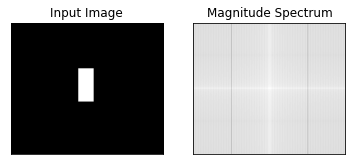

In [ ]:
import cv2 as cv
mg = cv.imread('/content/drive/MyDrive/buiding.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

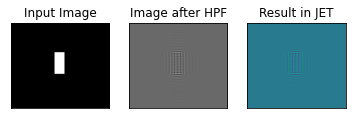

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

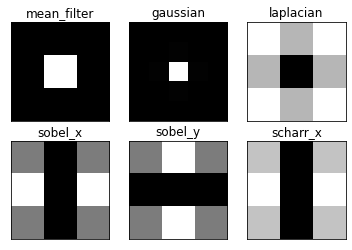

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

# Frequency Domain Specific Filters

**1. Low Pass Filter**

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# loaded the image in grayscale
image = cv2.imread('/content/drive/MyDrive/download.jpg',0)

image_float32 = np.float32(image) # convert from uint8 into float32

dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT) # Computed the 2-d discrete Fourier Transform
dft_shift = np.fft.fftshift(dft) # Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # compute magnitude spectrum

[]

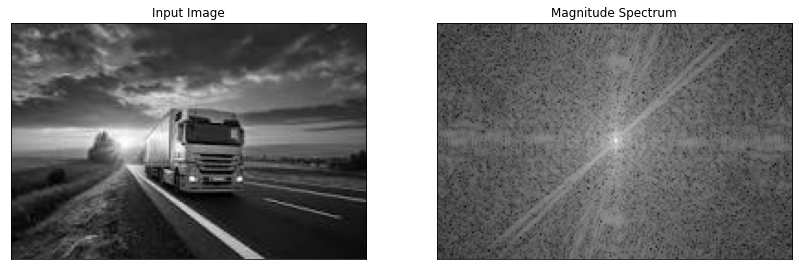

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 9), nrows=1, ncols=2)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Input Image')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(magnitude_spectrum, cmap = 'gray')
ax2.set_title('Magnitude Spectrum')
ax2.set_xticks([])
ax2.set_yticks([])

In [ ]:
dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [ ]:
rows, cols = image.shape
crow, ccol = rows//2 , cols//2     # center

In [ ]:
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

In [ ]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

(-0.5, 193.5, 128.5, -0.5)

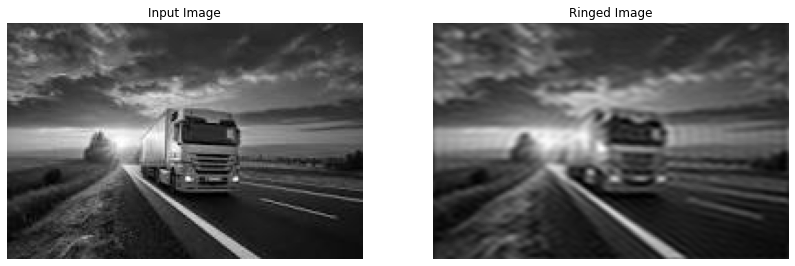

In [ ]:
plt.figure(figsize=(14,9))
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Ringed Image')
plt.axis('off')

**2. High Pass Filter**

In [ ]:
# loaded the image in grayscale
image = cv2.imread('/content/drive/MyDrive/download.jpg',0)

image_float32 = np.float32(image) # convert from uint8 into float32

dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT) # Computed the 2-d discrete Fourier Transform
dft_shift = np.fft.fftshift(dft) # Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # compute magnitude spectrum

[]

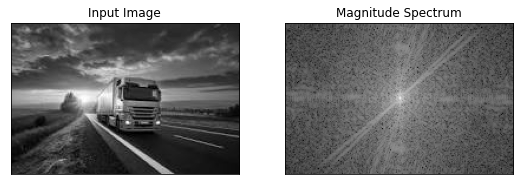

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(9, 5), nrows=1, ncols=2)
ax1.imshow(image, cmap = 'gray')
ax1.set_title('Input Image')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(magnitude_spectrum, cmap = 'gray')
ax2.set_title('Magnitude Spectrum')
ax2.set_xticks([])
ax2.set_yticks([])

In [ ]:
rows, cols = image.shape
crow, ccol = rows//2 , cols//2     # center

In [ ]:
# create a mask first, center square is 0, remaining all ones
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

In [ ]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

(-0.5, 193.5, 128.5, -0.5)

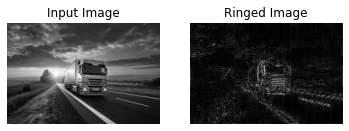

In [ ]:
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Ringed Image')
plt.axis('off')

## **Submitted By : Madhav Shrivastava**

## **Enroll no.   : 19100BTCSBS05597**